<font face="微软雅黑" size=5 color=#1E90F > Series

In [2]:
import pandas as pd
import numpy as np

In [2]:
s1 = pd.Series([1,3,5,7,np.NaN,9,11])#pandas中生产序列的函数，类似于我们平时说的数组
s1

0     1.0
1     3.0
2     5.0
3     7.0
4     NaN
5     9.0
6    11.0
dtype: float64

In [3]:
s2 = pd.Series([1,'网易',32,"jdisa"],index=['a','b','c','d'])
s2
#可以自己设置index

a        1
b       网易
c       32
d    jdisa
dtype: object

In [3]:
scores = {'jack':89,'rose':95,'john':76,'tom':74}
names = ['rose','john','tracy','jack']
s3 = pd.Series(scores)
s4 = pd.Series(scores,index=names)

print(s3)
s4
#字典作为series输入，name可以根据index对字典进行筛选和排序
#因为NaN是浮点型，所以s3中数据自动被转换成float，NaN:Not a Number

jack    89
rose    95
john    76
tom     74
dtype: int64


rose     95.0
john     76.0
tracy     NaN
jack     89.0
dtype: float64

In [6]:
print(s4['jack'])
print(s4[0])
#就算是更换了索引，自然索引依旧有用

89
89


In [7]:
s5 =pd.Series(['alpha','beta','cos','delta'],index=['a','b','c','d'])
s5.index = range(1,5)
print(s5[1]) #alpha
print(s5[0]) #index error
#series的索引也可以更改，如果是数字索引，为了防止歧义，自然索引失效

alpha


KeyError: 0

In [7]:
s = pd.Series(np.random.randint(10,20,size = 15))
#统计序列中每个元素出现的次数
print (s.value_counts())
#返回出现次数最多的元素
print (s.mode())

18    3
16    3
14    2
12    2
11    2
15    1
13    1
19    1
dtype: int64
0    16
1    18
dtype: int64


<font face="微软雅黑" size=5 color=#1E90F > Dataframe

<font face="微软雅黑" size=3 color=#1E90F > 生成dataframe

In [43]:
import pandas as pd 
import numpy as np
#标准创建
df1=pd.DataFrame(data=np.arange(16).reshape((4,4)),index=['a','b','c','d'],columns=['one','two','three','four'])
df1

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [48]:
#使用等长字典创建
d_data = {'A':1,'B':pd.Timestamp('20170220'),'C':range(4),'D':np.arange(4)}
df2 = pd.DataFrame(d_data)
print (df2)
#给定column则筛选对应column
df3=pd.DataFrame(d_data,columns=['C','A'])
df3

   A          B  C  D
0  1 2017-02-20  0  0
1  1 2017-02-20  1  1
2  1 2017-02-20  2  2
3  1 2017-02-20  3  3


,C,A
0,0,1
1,1,1
2,2,1
3,3,1


In [50]:
#使用嵌套字典创建,外层key是列名，内层key是行名
nest_dict={'shanghai':{2015:100,2016:101},'beijing':{2015:102,2016:103}}
df4=pd.DataFrame(data=nest_dict)
df4

,shanghai,beijing
2015,100,102
2016,101,103


<font face="微软雅黑" size=3 color=#1E90F >dataframe增删改查

In [52]:
#生成一个dataframe并设置index和columns
dates = pd.date_range('20170220',periods=6)
df5 = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['A','B','C','D'])
df5

,A,B,C,D
2017-02-20,0.257139,-0.635803,0.358046,1.568129
2017-02-21,-0.142045,0.609448,0.380365,0.791333
2017-02-22,-0.673952,2.484526,-0.016400,-0.404624
2017-02-23,0.190677,-0.315845,-0.584805,0.427505
2017-02-24,-0.625976,-2.483761,1.719780,-1.076210
2017-02-25,-0.940539,1.507590,-0.168271,1.230356


In [70]:
#增：为不存在的列赋值即为增
df5['E']=[1,2,3,4,5,6]
df5['f']='a'
df5

,A,B,C,D,E,f
2017-02-20,0.257139,-0.635803,0.358046,1.568129,1,a
2017-02-21,-0.142045,0.609448,0.380365,0.791333,2,a
2017-02-22,-0.673952,2.484526,-0.016400,-0.404624,3,a
2017-02-23,0.190677,-0.315845,-0.584805,0.427505,4,a
2017-02-24,-0.625976,-2.483761,1.719780,-1.076210,5,a
2017-02-25,-0.940539,1.507590,-0.168271,1.230356,6,a


In [72]:
#删 del是直接删除
del df5['f']
df5

,A,B,C,D,E
2017-02-20,0.257139,-0.635803,0.358046,1.568129,1
2017-02-21,-0.142045,0.609448,0.380365,0.791333,2
2017-02-22,-0.673952,2.484526,-0.016400,-0.404624,3
2017-02-23,0.190677,-0.315845,-0.584805,0.427505,4
2017-02-24,-0.625976,-2.483761,1.719780,-1.076210,5
2017-02-25,-0.940539,1.507590,-0.168271,1.230356,6


In [69]:
#删 drop 删除的是视图,axis确定行列
df = pd.DataFrame(data=np.random.randn(4,4),index=[0,1,2,3],columns=['a','b','c',0])
print(df.drop('a',axis=1))
print(df)
df=df.drop('a',axis=1)
print(df)
df=df.drop([0,1],axis=0)
print(df)

          b         c         0
0  0.703050 -0.029146 -0.348726
1 -0.329265 -0.243962  0.456098
2  0.936948 -2.206578  1.269321
3 -0.669552 -0.339220 -0.222534
          a         b         c         0
0  0.066182  0.703050 -0.029146 -0.348726
1 -0.317921 -0.329265 -0.243962  0.456098
2  1.051305  0.936948 -2.206578  1.269321
3 -1.062821 -0.669552 -0.339220 -0.222534
          b         c         0
0  0.703050 -0.029146 -0.348726
1 -0.329265 -0.243962  0.456098
2  0.936948 -2.206578  1.269321
3 -0.669552 -0.339220 -0.222534
          b         c         0
2  0.936948 -2.206578  1.269321
3 -0.669552 -0.339220 -0.222534


In [83]:
#改
df = pd.DataFrame(data=np.random.randn(4,3),index=[0,1,2,3],columns=['a','b','c'])
#具体某个值
df['a'][1]='abc'
#修改列,传入Series长度不够，用NaN填充，长度超过则截断
df['c']=pd.Series([1,2,3]) 
#修改行
df[2:3]=6
print(df)

          a         b    c
0   1.44264  0.709381  1.0
1       abc -0.276728  2.0
2         6  6.000000  6.0
3  0.969246 -0.364260  NaN


In [84]:
#查
#选取数据 是DataFrame的重点，常用的有 位置切片 和 标签切片，位置切片遵循Python的切片规则，包括起始位置，但不包括结束位置；
#但标签切片则同时包括起始标签和结束标签。之所以如此设计是因为在使用标签切片时，通常我们不知道标签的顺序，
#如果不包含结束标签，很难确定结束标签的前一个标签是什么
#生成一个dataframe并设置index和columns
dates = pd.date_range('20170220',periods=6)
data = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['A','B','C','D'])
print(data)

                   A         B         C         D
2017-02-20 -0.572113 -1.298063  0.833564  0.165773
2017-02-21  0.018248  1.001268 -1.507817 -0.231445
2017-02-22  1.217523 -0.936620 -0.307522 -0.344548
2017-02-23  0.220527 -0.384416 -0.478596 -0.093554
2017-02-24 -0.506479  0.846392 -0.143628 -1.048839
2017-02-25 -2.298962  0.210108 -1.779113 -1.264240


In [85]:
#输出A列
print(data.A)
#输出A列
print(data['A'])
#输出A,C两列，注意，两个[]，因为传入的是数组
print(data[['A','C']])

2017-02-20   -0.572113
2017-02-21    0.018248
2017-02-22    1.217523
2017-02-23    0.220527
2017-02-24   -0.506479
2017-02-25   -2.298962
Freq: D, Name: A, dtype: float64
2017-02-20   -0.572113
2017-02-21    0.018248
2017-02-22    1.217523
2017-02-23    0.220527
2017-02-24   -0.506479
2017-02-25   -2.298962
Freq: D, Name: A, dtype: float64
                   A         C
2017-02-20 -0.572113  0.833564
2017-02-21  0.018248 -1.507817
2017-02-22  1.217523 -0.307522
2017-02-23  0.220527 -0.478596
2017-02-24 -0.506479 -0.143628
2017-02-25 -2.298962 -1.779113


In [87]:
#loc选取
#输出3,4行，使用行索引取行
print (data.loc['20170222':'20170223'])
#输出3,4行,用的是行号，类似于range(1,5)是1~4，iloc[2:4]是行号2~3，其实是3-4行
print (data.iloc[2:4])
#选择相应的行和列,ix已经弃用
print(data.loc['20170222':'20170223','B':'D'])
print(data.iloc[0:2,0:2])


                   A         B         C         D
2017-02-22  1.217523 -0.936620 -0.307522 -0.344548
2017-02-23  0.220527 -0.384416 -0.478596 -0.093554
                   A         B         C         D
2017-02-22  1.217523 -0.936620 -0.307522 -0.344548
2017-02-23  0.220527 -0.384416 -0.478596 -0.093554
                   B         C         D
2017-02-22 -0.936620 -0.307522 -0.344548
2017-02-23 -0.384416 -0.478596 -0.093554
                   A         B
2017-02-20 -0.572113 -1.298063
2017-02-21  0.018248  1.001268


In [89]:
print(data.iloc[2,3])
print(data.iat[2,3])
print(data.loc['2017-02-22','D'])
#print(data.at['2017-02-22','D'])


-0.3445477086772086
-0.3445477086772086
-0.3445477086772086


后面跟多个空格代表换行   
取dataframe中相应的值总结：     
一般使用.loc和.iloc即可     
.loc,.at，选列是只能是列名，不能是position     
.iloc,.iat，选列是只能是position，不能是列名   

<font face="微软雅黑" size=3 color=#1E90F >dataframe更改数据类型

In [2]:
import pandas as pd
#创建df时候限定数据类型
df = pd.DataFrame(a, dtype='float')  #示例1
df = pd.DataFrame(data=d, dtype=np.int8) #示例2
df = pd.read_csv("somefile.csv", dtype = {'column_name' : str})

NameError: name 'a' is not defined

In [10]:
#对于单列或者Series
s = pd.Series(['1', '2', '4.7', 'pandas', '10'])
#pd.to_numeric(s) # or pd.to_numeric(s, errors='raise')
s = pd.to_numeric(s, errors='coerce')#遇到不是数的，强制转换为NaN
s = pd.to_numeric(s, errors='ignore')#遇到不是数的，忽略此次操作
#pd.to_datetime和pd.to_timedelta可将数据转换为日期和时间戳

0     1.0
1     2.0
2     4.7
3     NaN
4    10.0
dtype: float64
0         1
1         2
2       4.7
3    pandas
4        10
dtype: object


In [20]:
#多列问题
a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['col1','col2','col3'])
print(df.dtypes)
df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)#注意：两个 [[]]
print(df.dtypes)

col1    object
col2    object
col3    object
dtype: object
col1     object
col2    float64
col3    float64
dtype: object


In [26]:
#软转换——类型自动推断
df = pd.DataFrame({'a': [7, 1, 5], 'b': ['3','2','1']}, dtype='object')
df = df.infer_objects()
df.dtypes

a     int64
b    object
dtype: object

In [40]:
#astype强制转换,不要使用loc
a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df[['two','three']] = df[['two','three']] .astype(float)
df.dtypes

one       object
two      float64
three    float64
dtype: object

<font face="微软雅黑" size=3 color=#1E90F >dataframe表格属性

In [49]:
#生成一个dataframe并设置index和columns
dates = pd.date_range('20170220',periods=60)
data = pd.DataFrame(np.random.randn(60,4),index=dates,columns=list('ABCD'))
print(data)

                   A         B         C         D
2017-02-20  0.000622 -1.017392 -0.495367 -1.575044
2017-02-21 -0.533588 -0.605720  1.622157  0.146490
2017-02-22  1.101208 -0.671797 -0.283711  0.262485
2017-02-23 -0.382460  1.253921 -0.918284 -1.180554
2017-02-24  0.444353 -1.313709  0.706680  0.269977
2017-02-25 -0.912442 -0.150891  1.284399 -0.391768
2017-02-26  0.145506  0.868593 -0.349445 -0.791134
2017-02-27 -0.167558 -2.027558 -0.637197  0.559442
2017-02-28 -0.126950  0.268700 -0.775835  1.516664
2017-03-01  0.858988 -0.150576  1.395835 -0.059848
2017-03-02  1.163247  0.657537  0.169030 -2.043521
2017-03-03 -0.282192 -0.073466 -1.124967 -0.558543
2017-03-04  1.091213 -0.541976  1.001467  0.908610
2017-03-05 -2.684644  0.704315 -1.088316  2.032326
2017-03-06  2.017271 -0.770800 -0.207015 -0.945016
2017-03-07  0.190567 -0.627386 -1.471530 -1.173637
2017-03-08 -0.771425  0.196048 -0.398554 -0.948141
2017-03-09 -1.116154  0.263486  0.313040 -0.952846
2017-03-10 -0.171987  0.903523 

In [92]:
#输出DataFrame头部数据，默认为前5行
print(data.head())
#输出输出DataFrame第一行数据
print (data.head(1))
#输出DataFrame尾部数据，默认为后5行
print (data.tail())
#输出输出DataFrame最后一行数据
print (data.tail(1))


                   A         B         C         D
2017-02-20 -0.572113 -1.298063  0.833564  0.165773
2017-02-21  0.018248  1.001268 -1.507817 -0.231445
2017-02-22  1.217523 -0.936620 -0.307522 -0.344548
2017-02-23  0.220527 -0.384416 -0.478596 -0.093554
2017-02-24 -0.506479  0.846392 -0.143628 -1.048839
                   A         B         C         D
2017-02-20 -0.572113 -1.298063  0.833564  0.165773
                   A         B         C         D
2017-02-21  0.018248  1.001268 -1.507817 -0.231445
2017-02-22  1.217523 -0.936620 -0.307522 -0.344548
2017-02-23  0.220527 -0.384416 -0.478596 -0.093554
2017-02-24 -0.506479  0.846392 -0.143628 -1.048839
2017-02-25 -2.298962  0.210108 -1.779113 -1.264240
                   A         B         C        D
2017-02-25 -2.298962  0.210108 -1.779113 -1.26424


In [95]:
#输出行索引
print(data.index)
#输出列索引
print(data.columns)
#输出DataFrame数据值
print(data.values)
#输出DataFrame详细信息
print(data.describe())
print(data.columns.values.tolist())

DatetimeIndex(['2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23',
               '2017-02-24', '2017-02-25'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-0.57211306 -1.29806315  0.83356367  0.16577336]
 [ 0.01824767  1.00126754 -1.50781704 -0.23144459]
 [ 1.21752266 -0.93662038 -0.30752246 -0.34454771]
 [ 0.22052669 -0.38441623 -0.47859572 -0.09355373]
 [-0.50647889  0.84639242 -0.14362824 -1.04883883]
 [-2.29896224  0.21010755 -1.7791126  -1.2642403 ]]
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.320210 -0.093555 -0.563852 -0.469475
std    1.164919  0.940271  0.956061  0.562928
min   -2.298962 -1.298063 -1.779113 -1.264240
25%   -0.555705 -0.798569 -1.250512 -0.872766
50%   -0.244116 -0.087154 -0.393059 -0.287996
75%    0.169957  0.687321 -0.184602 -0.128026
max    1.217523  1.001268  0.833564  0.165773
['A', 'B', 'C', 'D']


In [15]:
#转置
print(data.T)
#输出维度信息
print(data.shape)
#转置后的维度信息
print(data.T.shape)


   2017-02-20  2017-02-21  2017-02-22  2017-02-23  2017-02-24  2017-02-25
A   -0.655308    2.542810   -1.314412   -0.127614   -1.658236   -1.663354
B    0.564074    2.198998   -0.124197    0.026045   -0.072914   -1.386193
C   -0.121373   -0.460727    0.651092   -0.870212   -1.237839    1.249623
D    0.695363    1.381967    0.144790    0.277401   -0.744470    0.229034
(6, 4)
(4, 6)


In [16]:
#将列索引排序，记忆：行列式，所以 逐行操作axis = 0,逐列操作axis =1
print (data.sort_index(axis = 1))
#列索引排序，降序
print (data.sort_index(axis = 1,ascending= False))
#按照A列的值进行升序排列
print (data.sort_values(by='A'))

                   A         B         C         D
2017-02-20 -0.655308  0.564074 -0.121373  0.695363
2017-02-21  2.542810  2.198998 -0.460727  1.381967
2017-02-22 -1.314412 -0.124197  0.651092  0.144790
2017-02-23 -0.127614  0.026045 -0.870212  0.277401
2017-02-24 -1.658236 -0.072914 -1.237839 -0.744470
2017-02-25 -1.663354 -1.386193  1.249623  0.229034
                   D         C         B         A
2017-02-20  0.695363 -0.121373  0.564074 -0.655308
2017-02-21  1.381967 -0.460727  2.198998  2.542810
2017-02-22  0.144790  0.651092 -0.124197 -1.314412
2017-02-23  0.277401 -0.870212  0.026045 -0.127614
2017-02-24 -0.744470 -1.237839 -0.072914 -1.658236
2017-02-25  0.229034  1.249623 -1.386193 -1.663354
                   A         B         C         D
2017-02-25 -1.663354 -1.386193  1.249623  0.229034
2017-02-24 -1.658236 -0.072914 -1.237839 -0.744470
2017-02-22 -1.314412 -0.124197  0.651092  0.144790
2017-02-20 -0.655308  0.564074 -0.121373  0.695363
2017-02-23 -0.127614  0.026045 

 <font face="微软雅黑" size=3 color=#1E90F >dataframe按条件筛选

In [103]:
dates = pd.date_range('20170220',periods=6)
data = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
print(data)
#输出A列中大于0的行
print(data[data.A > 0])
#输出大于0的数据，小于等于0的用NaN补位
print (data[data > 0])
#拷贝data
data2 =data.copy()
print (data2)
tag = ['a'] * 2 + ['b'] * 2 + ['c'] * 2
#在data2中增加TAG列用tag赋值
data2['TAG'] = tag
print (data2)
#打印TAG列中为a,c的行，isin
print (data2[data2.TAG.isin(['a','c'])])
print (data2[data2['TAG'].isin(['a','c'])])
#多条件筛选
print(data2[(data2["A"]<0) & (data2["B"]>0) ])
#用A,B列筛选CD列的值
data2[['C','D']][(data2["A"]<0.5) & (data2["B"]>-0.5) ]


                   A         B         C         D
2017-02-20 -1.923721  0.512644  0.314129 -0.803923
2017-02-21 -0.233486  1.679651 -0.969778  0.603586
2017-02-22  0.341055  0.408709  0.209715  2.518517
2017-02-23  0.382801 -0.308497 -1.039912 -0.488881
2017-02-24  0.700475 -2.166453 -0.228275 -0.157026
2017-02-25 -0.301981  0.628470 -0.104352 -0.408931
                   A         B         C         D
2017-02-22  0.341055  0.408709  0.209715  2.518517
2017-02-23  0.382801 -0.308497 -1.039912 -0.488881
2017-02-24  0.700475 -2.166453 -0.228275 -0.157026
                   A         B         C         D
2017-02-20       NaN  0.512644  0.314129       NaN
2017-02-21       NaN  1.679651       NaN  0.603586
2017-02-22  0.341055  0.408709  0.209715  2.518517
2017-02-23  0.382801       NaN       NaN       NaN
2017-02-24  0.700475       NaN       NaN       NaN
2017-02-25       NaN  0.628470       NaN       NaN
                   A         B         C         D
2017-02-20 -1.923721  0.512644 

,C,D
2017-02-20,0.314129,-0.803923
2017-02-21,-0.969778,0.603586
2017-02-22,0.209715,2.518517
2017-02-23,-1.039912,-0.488881
2017-02-25,-0.104352,-0.408931


 <font face="微软雅黑" size=3 color=#1E90F >dataframe计算

In [104]:
dates = pd.date_range('20170220',periods = 6)
df = pd.DataFrame(np.random.randn(6,4) , index = dates , columns = list('ABCD'))
print(df)
#按照索引构造新表
dfl = df.reindex(index = dates[0:4],columns = list(df.columns)+['E'])
print (dfl)
#将E列中的2,3行赋值为2
dfl.loc[dates[1:3],'E'] = 2
print (dfl)
#去掉存在NaN元素的行
print (dfl.dropna())
#将NaN元素赋值为5
print (dfl.fillna(5))
#判断每个元素是否为NaN
print (pd.isnull(dfl))
#求列平均值
print (dfl.mean(axis=0))
#针对行求平均值
print(dfl.mean(axis=1))
#对每列进行累加,比如(2,3)是第三行前4个元素的和，但是如果当前元素是null，则依然是null,cumsum：cumulative sum(累加和)
print (dfl.cumsum())
print (dfl.apply(np.cumsum))


                   A         B         C         D
2017-02-20 -0.867520 -0.616896  1.234057 -1.192292
2017-02-21  1.190589  0.313663 -1.477826  0.725838
2017-02-22 -1.265989 -0.952849  0.544085 -0.992765
2017-02-23 -0.249829 -0.010003  0.574739 -0.890102
2017-02-24 -1.828591 -0.469632  2.362101 -0.279441
2017-02-25 -1.068047  1.909419  0.385498  1.297053
                   A         B         C         D   E
2017-02-20 -0.867520 -0.616896  1.234057 -1.192292 NaN
2017-02-21  1.190589  0.313663 -1.477826  0.725838 NaN
2017-02-22 -1.265989 -0.952849  0.544085 -0.992765 NaN
2017-02-23 -0.249829 -0.010003  0.574739 -0.890102 NaN
                   A         B         C         D    E
2017-02-20 -0.867520 -0.616896  1.234057 -1.192292  NaN
2017-02-21  1.190589  0.313663 -1.477826  0.725838  2.0
2017-02-22 -1.265989 -0.952849  0.544085 -0.992765  2.0
2017-02-23 -0.249829 -0.010003  0.574739 -0.890102  NaN
                   A         B         C         D    E
2017-02-21  1.190589  0.313663 -

In [108]:
#生成序列并向右平移两位
s = pd.Series([1,3,5,np.nan,6,8],index = dates).shift(2)
print(s)
#df与s做减法运算
print(df)
print (df.sub(s,axis = 'index'))
#每列的最大值减去最小值,axis=0，可以理解为最终结果是行
print (df.apply(lambda x: x.max() - x.min()))
print (df.apply(lambda x: x.max() - x.min(),axis=1))

2017-02-20    NaN
2017-02-21    NaN
2017-02-22    1.0
2017-02-23    3.0
2017-02-24    5.0
2017-02-25    NaN
Freq: D, dtype: float64
                   A         B         C         D
2017-02-20 -0.867520 -0.616896  1.234057 -1.192292
2017-02-21  1.190589  0.313663 -1.477826  0.725838
2017-02-22 -1.265989 -0.952849  0.544085 -0.992765
2017-02-23 -0.249829 -0.010003  0.574739 -0.890102
2017-02-24 -1.828591 -0.469632  2.362101 -0.279441
2017-02-25 -1.068047  1.909419  0.385498  1.297053
                   A         B         C         D
2017-02-20       NaN       NaN       NaN       NaN
2017-02-21       NaN       NaN       NaN       NaN
2017-02-22 -2.265989 -1.952849 -0.455915 -1.992765
2017-02-23 -3.249829 -3.010003 -2.425261 -3.890102
2017-02-24 -6.828591 -5.469632 -2.637899 -5.279441
2017-02-25       NaN       NaN       NaN       NaN
A    3.019180
B    2.862268
C    3.839927
D    2.489346
dtype: float64
2017-02-20    2.426350
2017-02-21    2.668414
2017-02-22    1.810074
2017-02-23    

In [114]:
#自定义函数，操作dataframe
dates = pd.date_range('20170220',periods = 6)
df = pd.DataFrame(np.random.randn(6,4) , index = dates , columns = list('ABCD'))
print (df)
#定义一个函数
def _sum(x):
    return x.sum()
#apply函数可以接受一个函数作为参数
print (df.apply(sum))
print (df.apply(sum,axis=1))

                   A         B         C         D
2017-02-20  0.752098  0.113804 -0.525160 -2.336621
2017-02-21 -0.622098  0.088634  0.281673  0.331275
2017-02-22 -0.310047  0.069685 -0.963914  1.001960
2017-02-23 -0.192221  0.847543  1.899861  1.338990
2017-02-24  0.209225 -0.570606  0.697532 -1.149630
2017-02-25 -1.101067 -1.375703 -0.280616  0.010561
A   -1.264110
B   -0.826643
C    1.109376
D   -0.803464
dtype: float64
2017-02-20   -1.995879
2017-02-21    0.079483
2017-02-22   -0.202316
2017-02-23    3.894173
2017-02-24   -0.813479
2017-02-25   -2.746825
Freq: D, dtype: float64


In [66]:
df = pd.DataFrame(np.random.randn(10,4) , columns = list('ABCD'))
print (df)
#连接表
dfl = pd.concat([df.iloc[:3],df.iloc[3:7],df.iloc[7:]])
print (dfl)
#判断两个DataFrame中元素是否相等
print (df == dfl)
s = pd.Series(np.random.randint(1,5,size = 4),index = list('ABCD'))
print (s)
#通过序列添加一行
print (df.append(s,ignore_index = True))


          A         B         C         D
0 -1.093012 -0.354371  0.242328  1.021158
1 -0.349949  0.997632  0.971201  0.628634
2  0.058189  0.005813 -0.396134 -1.029099
3  2.178538 -1.868699  0.724196 -0.136352
4 -0.446982 -0.824146 -0.303399  1.802486
5 -0.225539 -0.712979 -0.629986 -1.685234
6 -0.027813 -0.230836 -0.048439  0.710463
7 -0.798780  0.370460  0.851822  0.657648
8  1.635211  1.959147 -1.067040 -0.145874
9 -0.448767 -1.059386 -1.253656  0.745560
          A         B         C         D
0 -1.093012 -0.354371  0.242328  1.021158
1 -0.349949  0.997632  0.971201  0.628634
2  0.058189  0.005813 -0.396134 -1.029099
3  2.178538 -1.868699  0.724196 -0.136352
4 -0.446982 -0.824146 -0.303399  1.802486
5 -0.225539 -0.712979 -0.629986 -1.685234
6 -0.027813 -0.230836 -0.048439  0.710463
7 -0.798780  0.370460  0.851822  0.657648
8  1.635211  1.959147 -1.067040 -0.145874
9 -0.448767 -1.059386 -1.253656  0.745560
      A     B     C     D
0  True  True  True  True
1  True  True  True  Tru

In [123]:
#groupby操作
df = pd.DataFrame({'A': ['foo','bar','foo','bar',
                         'foo','bar','foo','bar'],
                   'B': ['one','one','two','three',
                         'two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
print (df)
print (df.groupby('A').sum())
print (df.groupby(['A','B']).sum())
print (df.groupby(['B','A']).sum())

     A      B         C         D
0  foo    one -0.650837 -1.026963
1  bar    one  1.291559 -0.061404
2  foo    two -0.764784 -0.519099
3  bar  three  0.726245  0.512457
4  foo    two  1.368450 -0.014136
5  bar    two  0.040207 -0.044582
6  foo    one  0.239617  0.043660
7  bar  three -0.840434  0.337200
            C         D
A                      
bar  1.217578  0.743671
foo  0.192445 -1.516539
                  C         D
A   B                        
bar one    1.291559 -0.061404
    three -0.114188  0.849657
    two    0.040207 -0.044582
foo one   -0.411220 -0.983304
    two    0.603666 -0.533236
                  C         D
B     A                      
one   bar  1.291559 -0.061404
      foo -0.411220 -0.983304
three bar -0.114188  0.849657
two   bar  0.040207 -0.044582
      foo  0.603666 -0.533236


In [89]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
print (df)
#根据A，B索引为行，C的索引为列处理D的值
print (pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']))
#A列等于one为索引，根据C列组合的平均值
print (df[df.A=='one'].groupby('C').mean())


        A  B    C         D         E
0     one  A  foo -0.190977 -0.039160
1     one  B  foo -0.909429 -0.443823
2     two  C  foo -1.167702 -1.392387
3   three  A  bar  0.495145  0.193711
4     one  B  bar  0.073704  0.654376
5     one  C  bar  0.850119  1.367398
6     two  A  foo -1.918914 -0.157610
7   three  B  foo  0.417583 -1.361749
8     one  C  foo  0.050866 -1.638566
9     one  A  bar -0.027325 -1.612422
10    two  B  bar  1.277080 -0.323482
11  three  C  bar  1.074753  0.125101
C             bar       foo
A     B                    
one   A -0.027325 -0.190977
      B  0.073704 -0.909429
      C  0.850119  0.050866
three A  0.495145       NaN
      B       NaN  0.417583
      C  1.074753       NaN
two   A       NaN -1.918914
      B  1.277080       NaN
      C       NaN -1.167702
            D         E
C                      
bar  0.298833  0.136451
foo -0.349847 -0.707183


 <font face="微软雅黑" size=3 color=#1E90F >dataframe时间序列

In [94]:
#创建一个以20170220为基准的以秒为单位的向前推进600个的时间序列
rng = pd.date_range('20170220', periods=600, freq='s')
print (rng)
#以时间序列为索引的序列
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print (ts)


DatetimeIndex(['2017-02-20 00:00:00', '2017-02-20 00:00:01',
               '2017-02-20 00:00:02', '2017-02-20 00:00:03',
               '2017-02-20 00:00:04', '2017-02-20 00:00:05',
               '2017-02-20 00:00:06', '2017-02-20 00:00:07',
               '2017-02-20 00:00:08', '2017-02-20 00:00:09',
               ...
               '2017-02-20 00:09:50', '2017-02-20 00:09:51',
               '2017-02-20 00:09:52', '2017-02-20 00:09:53',
               '2017-02-20 00:09:54', '2017-02-20 00:09:55',
               '2017-02-20 00:09:56', '2017-02-20 00:09:57',
               '2017-02-20 00:09:58', '2017-02-20 00:09:59'],
              dtype='datetime64[ns]', length=600, freq='S')
2017-02-20 00:00:00    207
2017-02-20 00:00:01    453
2017-02-20 00:00:02    249
2017-02-20 00:00:03    446
2017-02-20 00:00:04    119
2017-02-20 00:00:05    371
2017-02-20 00:00:06    434
2017-02-20 00:00:07    336
2017-02-20 00:00:08    385
2017-02-20 00:00:09     81
2017-02-20 00:00:10    273
2017-02-20 00

In [100]:
#重采样，以2分钟为单位进行加和采样
print (ts.resample('2Min').sum())
#列出2011年1季度到2017年1季度
rng1 = pd.period_range('2011Q1','2017Q1',freq='Q')
print (rng1)
#转换成时间戳形式
print (rng1.to_timestamp())
#时间加减法
print (pd.Timestamp('20170220') - pd.Timestamp('20170112'))
print (pd.Timestamp('20170220') + pd.Timedelta(days=12))

2017-02-20 00:00:00    28112
2017-02-20 00:02:00    30091
2017-02-20 00:04:00    28561
2017-02-20 00:06:00    29318
2017-02-20 00:08:00    31167
Freq: 2T, dtype: int64
PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')
DatetimeIndex(['2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01'],
           

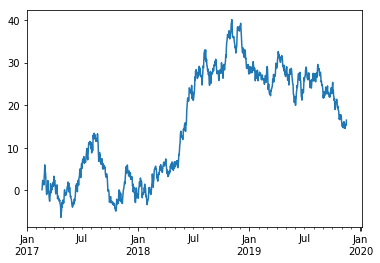

2017-02-20     0.100010
2017-02-21     1.381174
2017-02-22     2.279252
2017-02-23     1.905942
2017-02-24     1.370108
2017-02-25     2.069247
2017-02-26     1.205167
2017-02-27     2.927226
2017-02-28     4.005603
2017-03-01     5.926125
2017-03-02     3.871581
2017-03-03     4.274674
2017-03-04     3.424288
2017-03-05     1.620933
2017-03-06     0.100785
2017-03-07    -1.054755
2017-03-08    -0.049443
2017-03-09    -0.773953
2017-03-10    -0.056507
2017-03-11     2.246145
2017-03-12     0.113703
2017-03-13    -0.002054
2017-03-14    -0.323102
2017-03-15    -1.506365
2017-03-16    -2.285710
2017-03-17    -2.616572
2017-03-18    -1.580702
2017-03-19    -0.962903
2017-03-20     1.524576
2017-03-21     0.378179
                ...    
2019-10-18    19.311471
2019-10-19    19.719351
2019-10-20    18.850290
2019-10-21    18.761496
2019-10-22    18.391864
2019-10-23    16.732085
2019-10-24    16.836528
2019-10-25    16.568698
2019-10-26    17.763979
2019-10-27    17.165954
2019-10-28    17

In [118]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('20170220', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()
print(ts)


In [105]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
print (df)
#添加类别数据，以raw_grade的值为类别基础
df["grade"] = df["raw_grade"].astype("category")
print (df)
#打印类别
print (df["grade"].cat.categories)
#更改类别
df["grade"].cat.categories = ["very good", "good", "very bad"]
print(df)
#根据grade的值排序
print (df.sort_values(by='grade', ascending=True))
#根据grade排序显示数量
print (df.groupby("grade").size())


   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e
Index(['a', 'b', 'e'], dtype='object')
   id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad
   id raw_grade      grade
0   1         a  very good
3   4         a  very good
4   5         a  very good
1   2         b       good
2   3         b       good
5   6         e   very bad
grade
very good    3
good         2
very bad     1
dtype: int64


 <font face="微软雅黑" size=3 color=#1E90F >dataframe层次化索引